### Fourier Transform 

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from numpy import fft 
import random
import os 


signal and signal with noise

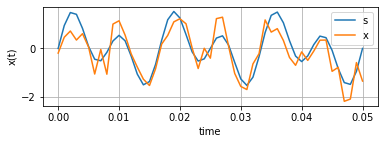

In [5]:
fmax = 1000  # sampling frequency 1000Hz
dt = 1/fmax
N = 1500

t = np.arange(0, N) * dt 
s = 0.7 * np.sin(2 * np.pi * 60 * t) + np.sin(2 * np.pi * 120 * t)
x = s + .5 * np.random.randn(N)

plt.subplot(2, 1, 1)
plt.plot(t[0:51], s[0:51], label='s')
plt.plot(t[0:51], x[0:51], label='x')
plt.legend()
plt.xlabel('time')
plt.ylabel('x(t)')
plt.grid()

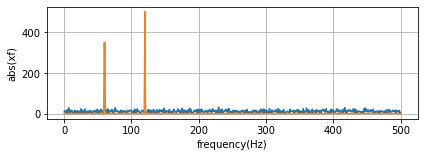

In [7]:
# Fourier spectrum 
df = fmax/N 
f = np.arange(0, N) * df 

sf = np.fft.fft(s) * df 
xf = np.fft.fft(x) * df 

plt.subplot(2, 1, 1) 
plt.plot(f[0:int(N/2 + 1)], np.abs(xf[0: int(N/2 + 1)]))
plt.plot(f[0:int(N/2 +1)], np.abs(sf[0:int(N/2 + 1)]))
plt.xlabel("frequency(Hz)"); plt.ylabel("abs(xf)"); plt.grid()
plt.tight_layout()

t = np.arange(0, N) * dt 
sr = np.fft.fft(sf) / df 
xr = np.fft.fft(xf) / df 
plt.subplot(2, 1, 2)
plt.plot()

In [9]:
import numpy as np
import matplotlib.pyplot as plt 

# Signal Properties 
N = 1024; T=10e-6; dt=T/N 
t = np.arange(0, T, dt)



(0.0, 9.990234375000001e-06)

In [10]:
delay_profile = {"power": [0.6, 0.4],
                 "time": [0, 3e-3]}


    


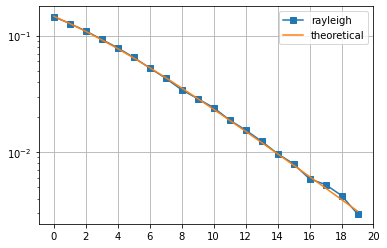

In [177]:
N = 10**5

ip = np.random.randint(0, 2, N) 
s = 2 * ip - 1 # BPSK modulation 

snr_db = np.arange(0, 20) 
simBER = []
for snr in snr_db: 
    n = 1/np.sqrt(2) * (np.random.normal(0, 1, N) + 1j*np.random.normal(0, 1, N))
    h = 1/np.sqrt(2) * (np.random.normal(0, 1, N) + 1j*np.random.normal(0, 1, N))

    # channel and noise addition 
    y = h * s + 10**(-snr/20)*n 

    # Equalization 
    yHat = y / h 

    ipHat = [int(np.real(x)>0) for x in yHat]

    simBER.append(np.sum(ip!=ipHat))

simBER = np.array(simBER) / N 

snr = 10 ** (snr_db/10)
theoryBER = 0.5 * (1 - np.sqrt(snr/(snr+1)))

plt.figure()
plt.semilogy(simBER, 's-', label='rayleigh')
plt.semilogy(theoryBER, label='theoretical')
plt.legend()
plt.xticks(range(0, 22, 2))
plt.grid()
plt.show() 

In [153]:
n = [1/np.sqrt(2) * (np.random.normal(0, 1, N) + 1j*np.random.normal(0, 1, N)) for _ in range(len(snr_db))]
h = [1/np.sqrt(2) * (np.random.normal(0, 1, N) + 1j*np.random.normal(0, 1, N)) for _ in range(len(snr_db))]

y = [h[i] * s + 10**(-snr/10) * n[i] for i, snr in enumerate(snr_db)]
# y = [h * s for _ in snr_db]

yHat = [y[i] / h[i] for i, _ in enumerate(snr_db)]

ipHat = [(np.real(yHat[i]) > 1) * 1 for i, _ in enumerate(snr_db)]

BER = np.array([np.sum((ipHat[i] != ip[i])*1) for i, _ in enumerate(snr_db)])
BER = BER / N




In [184]:
N = 10 ** 5 
SNR = 10 
K = 2 

ip = np.random.randint(0, 2, N)
s = 2 * ip - 1 

nTap = 2
ht = [0.6, 0.4] 
l = len(ht) 

chanout = np.convolve(s, ht)
n = 1/np.sqrt(2) * (np.random.normal(0, 1, N + len(ht) - 1) + 1j * np.random.normal(0, 1, N + len(ht) - 1))

# noise addition 
y = chanout + 10 ^ (-SNR / 20) * n 



In [185]:
len(n)

100001

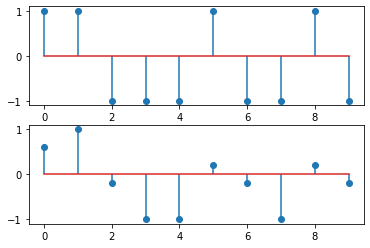

In [183]:
plt.figure()
plt.subplot(2, 1, 1)
plt.stem(s[0:10])
plt.subplot(2, 1, 2)
plt.stem(chanout[0:10])
plt.show()